# Brain Tumor Classifier

David Solis  
dsolis@apache.org  
https://github.com/david-solis/brain-tumor-classifier

## Introduction
Every part of the human body has several cells, and all cells have capabilities.
Some cells usually grow, and some lose their capability and resist and grow anomalous.
These mass collections of the cells develop the tissue, which is called a “tumor.”
In other words, the uneven development of tissues in the brain causes brain tumors [1].

| ![Figure 1](images/mri-brain.jpg "Figre 1") | 
|:--:| 
| *Figure 1. Anatomical features of the brain through MRI* [1]. |

Essentially, there are two types of brain tumors: (1) benign, non-cancerous,  a mass of cells that grow relatively
slowly in the brain that stay in one place and do not spread, and (2) malignant brain tumor, fast-growing cancer that
spreads to other areas of the brain and spine (Figure 1) [7], [8], [9].

Also, there is another classification for brain tumors: (1) low-grade tumor (e.g., gliomas and meningiomas) and (2)
high-grade tumor (e.g., glioblastoma and astrocytomas). Generally, brain tumors are graded from I to IV according to
their behavior, such as how quickly they grow and how probable they are to grow back after treatment. The low-grade I
and II glioma, classified as benign tumors, which are curable tumors with surgical excision. The high-grade III and IV, classified as malignant tumors treated by radiotherapy and chemotherapy [5], [7], [8], [9].

Based on the information they capture, the categories of brain imaging modalities are structural and functional
imaging. The structural or anatomical modalities aim at visualizing the different structures and tissues of the brain.
The most popular Neuroimaging studies are the Computed Tomography (CT) and Magnetic Resonance Imaging (MRI). Functional imaging aims to study the human brain’s function based on physiological changes caused by the brain’s activity [7].

MRI has the convenience of being non-invasive, and its non-ionizing technique produces images with excellent tissue
contrast, addressing it the modality of choice for the brain (and more specifically, brain tumors) study. The MRI
foundation is the Nuclear Magnetic Resonance (NMR) principle, commonly used in spectroscopy to study molecules’
physical and chemical properties [7].

Physicians use MRI broadly to obtain detailed information about the anatomy and function of different body organs.
Significantly, MRI of the brain is an excellent method to capture changes in the brain’s internal structure and
activity state and has been used to examine the brain’s functional mechanisms and diagnose brain disorders such as
brain maturation, impaired brain structures in neurodegenerative and abnormal functional connectivity in some
psychiatric disorders. The brain received electromagnetic waves, and signals are recorded and reconstructed on images,
and a computer program analyzes these images (Figure 1) [6].

| ![Figure 2](images/deep-learning-workflow.jpg "Figre 2") | 
|:--:| 
| *Figure 2. Typical workflows of deep learning systems for predictive modelling* [2].|

Recently, deep learning has shown better performance over traditional machine learning approaches in various tasks,
for example, pattern recognition (i.e., object detection) and image segmentation. Deep learning is a particular
subfield of machine learning that employs artificial neural networks, allowing raw data processing directly. Indeed,
deep neural networks are becoming widespread in MRI analysis of the brain and are applied more in MRI than other
medical imaging types (Figure 2). For example, researchers use deep learning to preprocess and analyze MRI images
(applying deep feature extraction or end-to-end learning), including brain segmentation, noise reduction, registration, improved resolution, injury detection, and disease diagnosis. MRI analysis challenges, such as the [BraT
(Multimodal Brain Tumor Segmentation) challenge](https://www.med.upenn.edu/cbica/brats2020/) and the [TADPOLE (Longitudinal Evolution Prediction of Alzheimer’s Disease) challenge](https://tadpole.grand-challenge.org/), implemented some common deep learning approaches [6].

| ![Figure 3](images/cnn-building-blocks.jpg "Figre 3") | 
|:--:| 
| *Figure 3. Building blocks of a typical CNN* [3].|

The convolutional neural network (CNN)  is the most used for medical image processing tasks among different neural
network architectures (Figure 3). These networks are characterized by convolutional layers between neurons’ layers,
convolving an input image with a given kernel function.  The convolution layers depend on the application purpose,
i.e., during training, the convolution layer weights can extract characteristics of the image adapted to the
investigated task. The same kernel parameters are applied to the entire image, thus reducing the overall number of
trainable parameters and making the training process more efficient. One (two or three) dimensional convolutional
kernels can be employed depending on input and output data dimensionality [2], [4].

Pooling layers are another critical component of the CNN architecture: they reduce feature map resolution to introduce
translational invariance to minor image distortions. Moreover, the combination of convolutional and pooling layers
allows for learning spatial hierarchies among feature patterns. The stack of linear and nonlinear (convolution and
activation, respectively)  processing layers operate as a feature extractor, progressively raising the level of
abstraction, invariance, and discriminative power across layers. After this processing, a series of fully connected
layers that perform the learning task combined these features (Figure 4) [2], [4].

| ![Figure 4](images/cnn-example.jpg "Figure 4") | 
|:--:| 
| *Figure 4. An example of a CNN* [4].|

## Objective
The purpose of this work is to implement two deep learning models for the detection of tumors in the human brain using public data sets of MRI scans. The first model consists of building a CNN from scratch (end-to-end learning), and the second is incorporating a pre-trained model with a technique called transfer learning. For this second case, we used the Inception v3 (the third edition of Google's Inception Convolutional Neural Network) [13] model architecture and weights to train the model. 

## Implementation

In [1]:
import cv2
import glob
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

One limitation of this work is that most neurology and neuroscience datasets are not publicly available due to privacy concerns. In such a way, we use two public datasets.

1. [Brain MRI Images for Brain Tumor Detection](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection). This dataset contains 196 images.
2. [Kaggle Brain Tumor Detection 2020](https://www.kaggle.com/ahmedhamada0/brain-tumor-detection). There are 3000 images in this dataset.

To select the dataset to use, we have to change the value of *DATASET* to *DATASET_1* or *DATASET_2*

In [2]:
# Declare the constants utilized

DATASET_1 = 'dataset-1'
DATASET_2 = 'dataset-2'
DATASET = DATASET_1

SIZE = 224
IMG_SIZE = (SIZE, SIZE)

VERBOSE = 1
PATIENCE = 25

PADDING = 'same'
ACTIVATION_1 = 'relu'
ACTIVATION_2 = 'softmax'
ACTIVATION_3 = 'sigmoid'

MODEL_NAME = 'model.h5'
INCEPTION_MODEL_NAME = 'inception-model.h5'

LEARNING_RATE = 0.0001

In [3]:
# Setup for PyCharm

PROJECT_PATH = '/project'
current_path = !pwd
if current_path[0].find(PROJECT_PATH) < 0:
    %cd PROJECT

In [4]:
def get_filenames(path):
    i_filenames = []
    for fn in glob.glob(path):
        i_filenames.append(fn)
    return i_filenames

no_path = DATASET + '/no/*.jpg'
yes_path = DATASET + '/yes/*.jpg'

In [5]:
labels = ['Normal', 'Tumor']

# Load information into dataframe
df_train_no = pd.DataFrame({'image':get_filenames(no_path), 'label': labels[0]})
df_train_yes = pd.DataFrame({'image':get_filenames(yes_path), 'label': labels[1]})
train_data = pd.concat([df_train_no, df_train_yes])

### Exploratory Data Analysis

In [6]:
train_data.head()

,image,label
0,dataset-2/no/no1157.jpg,Normal
1,dataset-2/no/no132.jpg,Normal
2,dataset-2/no/no654.jpg,Normal
3,dataset-2/no/no640.jpg,Normal
4,dataset-2/no/no898.jpg,Normal


In [7]:
train_data.tail()

,image,label
1495,dataset-2/yes/y364.jpg,Tumor
1496,dataset-2/yes/y1428.jpg,Tumor
1497,dataset-2/yes/y402.jpg,Tumor
1498,dataset-2/yes/y416.jpg,Tumor
1499,dataset-2/yes/y370.jpg,Tumor


<AxesSubplot:>

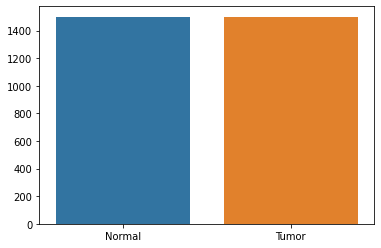

In [8]:
# Show classes frequency distribution

sns.barplot(x=labels, y=[df_train_no.shape[0], df_train_yes.shape[0]])

In [9]:
def plot_images(df, title):
    sample = df.sample(10)
    _, ax = plt.subplots(2, 5, figsize= (15, 10))
    images = [image for image in sample['image']]

    for i, image in zip(range(len(images)), images):
        row = int(i/5)
        col = i%5
        ax[row,col].imshow(cv2.imread(image))
        ax[row,col].axis('off')
    plt.suptitle(title, fontsize='xx-large')
    plt.show()


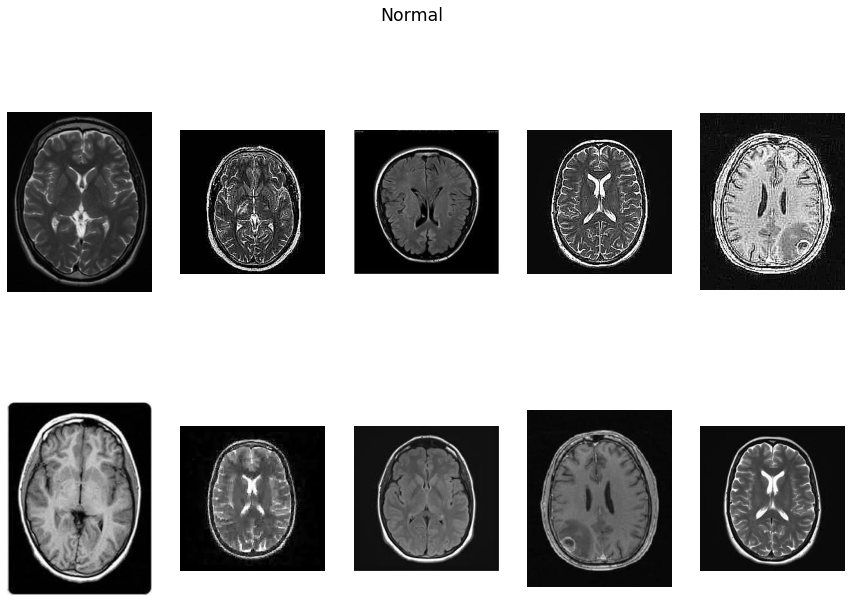

In [10]:
# Show a sample of 10 images of Train Data for the normal brain

plot_images(df_train_no, labels[0])

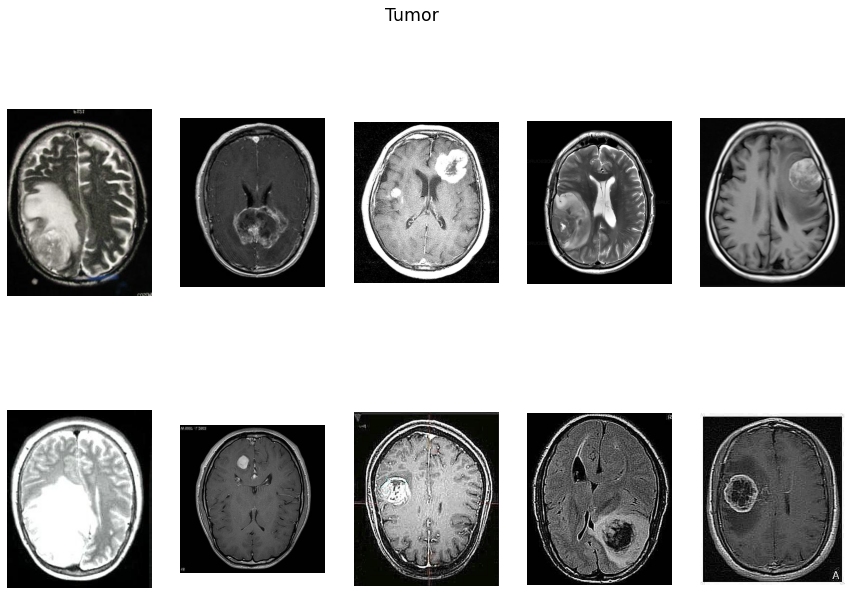

In [11]:
# Show a sample of 10 images of Train Data for the brain with a tumor

plot_images(df_train_yes, labels[1])

An important observation is that the width and height of the images are not homogeneous and have significant variation.

### Data Augmentation

In situations where data cannot be collected, the data collected is not well represented, or the datasets are too small, it requires generating data in some way. Data augmentation involves manipulating the input data to create more variants of the same data.  Data augmentation can solve many issues, including overfitting, not enough training data, and imbalanced datasets [10], [11].

Data augmentation is generally done as part of the process that feeds the model input data during training. Instead of feeding the original training image, it randomly applies some magnification to transform it. For example, an image is shifted and scaled to produce more abundant derived images. Data augmentation methods are distinct for different types of data [10], [11].

As we declared earlier, an obvious strategy to combat overfitting is to get more training data. In our case, this is not possible. But we can use the class [ImageDataGenerator](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) to obtain new images from existing ones by applying some kind of transformation to the original images and using the transformed images as additional training data. [ImageDataGenerator](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) creates augmented image data just-in-time during the training in a random way.

More specifically, we apply the following transformations:
* Rescale by a factor
* Rotate
* Shift by a certain number of pixels horizontally or vertically
* Shear
* Change its brightness
* Flip horizontally or vertically

The following code excerpt illustrates how [ImageDataGenerator](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) works by showing the original image, and its ten random transforms applied.

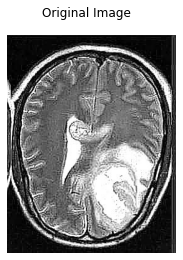

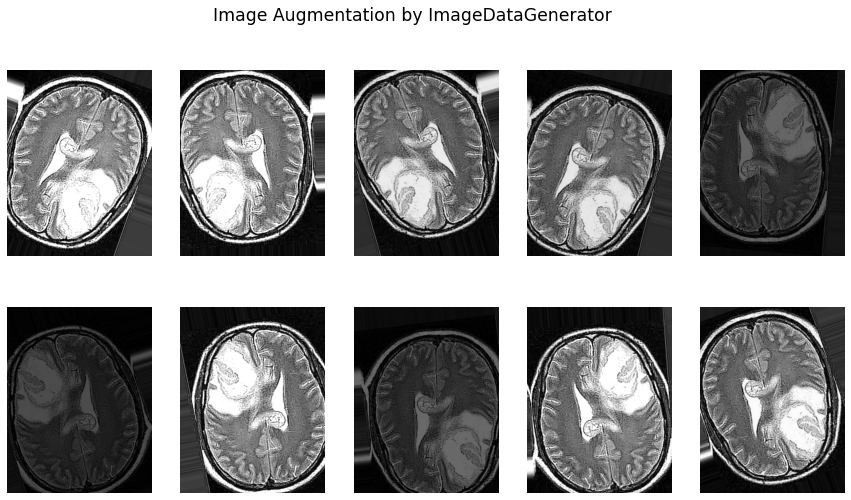

In [12]:
def show_images(images):
    _, ax = plt.subplots(2,5, figsize= (15,8))
    for i in range(10):
        row = int(i/5)
        col = i%5
        ax[row,col].imshow(images[i], cmap = 'gray')
        ax[row,col].axis('off')
    plt.suptitle('Image Augmentation by ImageDataGenerator', fontsize='xx-large')
    plt.show()

demo_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=20,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  brightness_range=[0.3, 1.5],
                                  horizontal_flip=True,
                                  vertical_flip=True)

image_name = [i for i in train_data.sample(1)['image']][0]
im = cv2.imread(image_name)
plt.imshow(im)
plt.axis('off')
plt.suptitle('Original Image')
plt.show()

im = im.reshape((1,) + im.shape)
im_array = []
for _ in range(10):
    im_iterator = demo_datagen.flow(im, batch_size=1)
    im_from_datagen = next(im_iterator)
    im_array.append(np.squeeze(im_from_datagen, axis=(0,)))

show_images(im_array)

### Split Data

In [13]:
X_train, X_val = train_test_split(train_data, test_size = 0.1, shuffle = True)
X_test = train_data.sample(10)

### Build a CNN from Scratch

In [14]:
# Build Model

def build_model():
    m = Sequential()
    m.add(Conv2D(64,(5,5), activation = ACTIVATION_1, padding = PADDING,strides=(2,2), input_shape = [224,224,1]))
    m.add(MaxPooling2D(2))
    m.add(Conv2D(128,(5,5), activation = ACTIVATION_1, padding = PADDING, strides=(2,2)))
    m.add(Conv2D(128,(5,5), activation = ACTIVATION_1, padding = PADDING, strides=(2,2)))
    m.add(Conv2D(256,(5,5), activation = ACTIVATION_1, padding = PADDING, strides=(2,2)))
    m.add(MaxPooling2D(2))
    m.add(Flatten())
    m.add(Dense(64, activation = ACTIVATION_1))
    m.add(Dropout(0.4))
    m.add(Dense(32, activation = ACTIVATION_1))
    m.add(Dropout(0.4))
    m.add(Dense(2, activation = ACTIVATION_2))
    return m

In [15]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       204928    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       409728    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

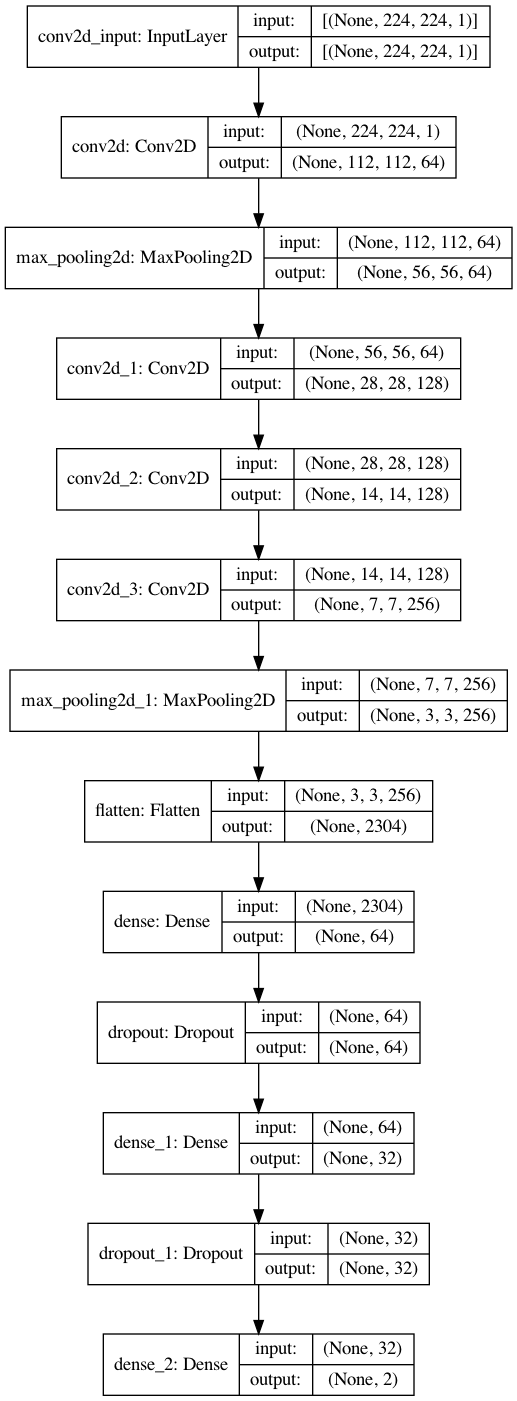

In [16]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
# Compile Model

def compile_model(m, learning_rate=LEARNING_RATE):
    m.compile(optimizer = RMSprop(learning_rate = learning_rate), loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [18]:
# Compile Model

compile_model(model, learning_rate=0.001)

In [19]:
# Model Fit
def model_fit(m, model_name, t_data, v_data):
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=PATIENCE, verbose=VERBOSE)
    checkpoint = ModelCheckpoint(model_name, monitor='val_accuracy', verbose=VERBOSE, save_best_only=True)
    return m.fit(t_data, validation_data = v_data, epochs= 100,
                    batch_size = 32,
                    callbacks=[early_stopping, checkpoint])

# Model Training
def model_training(m, model_name, idg, train, val, color_mode='rgb'):
    train_set = idg.flow_from_dataframe(train,
                                        x_col = 'image',
                                        y_col = 'label',
                                        classes = labels,
                                        target_size = IMG_SIZE,
                                        color_mode = color_mode,
                                        batch_size = 10,
                                        shuffle = True,
                                        interpolation = 'bilinear')
    val_set = idg.flow_from_dataframe(val,
                                        x_col = 'image',
                                        y_col = 'label',
                                        classes = labels,
                                        target_size = IMG_SIZE,
                                        color_mode = color_mode,
                                        batch_size = 10,
                                        shuffle = True,
                                        interpolation = 'bilinear')
    return model_fit(m, model_name, train_set, val_set)


In [20]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             vertical_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5],
                             validation_split=0.2,)

# Train Model
history = model_training(model, MODEL_NAME, datagen, X_train, X_val, color_mode='grayscale')

Found 2700 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.
Epoch 1/100
270/270 [==============================] - 36s 132ms/step - loss: 0.7255 - accuracy: 0.5233 - val_loss: 0.6071 - val_accuracy: 0.6833

Epoch 00001: val_accuracy improved from -inf to 0.68333, saving model to model.h5
Epoch 2/100
270/270 [==============================] - 32s 117ms/step - loss: 0.6160 - accuracy: 0.6835 - val_loss: 0.5671 - val_accuracy: 0.6933

Epoch 00002: val_accuracy improved from 0.68333 to 0.69333, saving model to model.h5
Epoch 3/100
270/270 [==============================] - 32s 118ms/step - loss: 0.5776 - accuracy: 0.7121 - val_loss: 0.5932 - val_accuracy: 0.7133

Epoch 00003: val_accuracy improved from 0.69333 to 0.71333, saving model to model.h5
Epoch 4/100
270/270 [==============================] - 32s 119ms/step - loss: 0.5664 - accuracy: 0.7213 - val_loss: 0.5731 - val_accuracy: 0.7267

Epoch 00004: val_accuracy improved from

270/270 [==============================] - 32s 118ms/step - loss: 0.3990 - accuracy: 0.8489 - val_loss: 0.3871 - val_accuracy: 0.8567

Epoch 00039: val_accuracy did not improve from 0.88333
Epoch 40/100
270/270 [==============================] - 32s 119ms/step - loss: 0.3669 - accuracy: 0.8784 - val_loss: 0.3975 - val_accuracy: 0.8033

Epoch 00040: val_accuracy did not improve from 0.88333
Epoch 41/100
270/270 [==============================] - 32s 118ms/step - loss: 0.3991 - accuracy: 0.8425 - val_loss: 0.4083 - val_accuracy: 0.8300

Epoch 00041: val_accuracy did not improve from 0.88333
Epoch 42/100
270/270 [==============================] - 32s 119ms/step - loss: 0.4466 - accuracy: 0.8427 - val_loss: 0.3534 - val_accuracy: 0.8533

Epoch 00042: val_accuracy did not improve from 0.88333
Epoch 43/100
270/270 [==============================] - 32s 120ms/step - loss: 0.4402 - accuracy: 0.8285 - val_loss: 0.3263 - val_accuracy: 0.8600

Epoch 00043: val_accuracy did not improve from 0.8833

#### Model Metrics

In [21]:
def acc_loss_plot(results):

    acc = results['accuracy']
    val_acc = results['val_accuracy']
    loss = results['loss']
    val_loss = results['val_loss']

    _, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.suptitle('Model Metrics')
    plt.show()


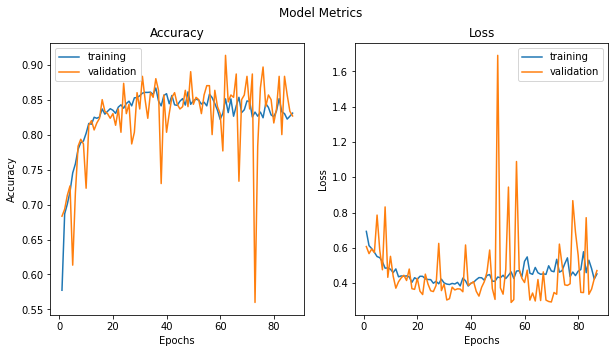

In [22]:
acc_loss_plot(history.history)

#### Predictions

In [23]:
# Load Model from File

model = keras.models.load_model(MODEL_NAME)

In [24]:
def get_predictions(m, data, idg=ImageDataGenerator(rescale = 1./255),color_mode='rgb'):
    i_iterator = idg.flow_from_dataframe(data,
                                         x_col = 'image',
                                         y_col = 'label',
                                         target_size = IMG_SIZE,
                                         color_mode = color_mode,
                                         class_mode = None,
                                         batch_size = data.shape[0],
                                         shuffle = False,
                                         interpolation = 'bilinear')
    p = m.predict(i_iterator)
    p = p.argmax(axis=-1)
    true_values=[0 if label == labels[0] else 1 for label in data['label']]
    clf_report = classification_report(true_values, p)
    print(clf_report)

    cm = confusion_matrix(true_values, p)
    display = ConfusionMatrixDisplay(cm, display_labels=labels)
    display.plot(cmap=plt.cm.Blues, colorbar=False)
    return i_iterator, p

Found 300 validated image filenames.
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       145
           1       0.91      0.86      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



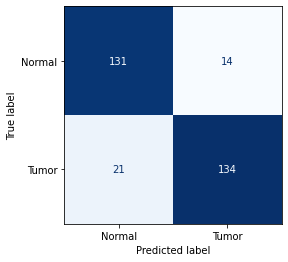

In [25]:
# Predictions for Validation Data

_, _ = get_predictions(model, X_val, color_mode='grayscale')

Found 10 validated image filenames.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



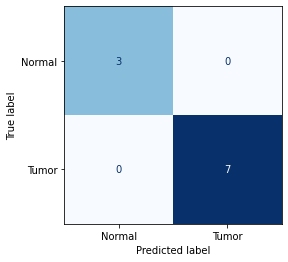

In [26]:
# Predictions for Test Data

image_iterator, predictions = get_predictions(model, X_test, color_mode='grayscale')

In [27]:
import logging

def show_predictions(data, i_iterator, p):
    predicted_labels = [labels[x] for x in p]
    _, ax = plt.subplots(2,5, figsize= (15,8))
    logger = logging.getLogger()
    current_level = logger.level
    logger.setLevel(100)

    for i, x in zip(range(10), next(i_iterator)):
        row = int(i/5)
        col = i%5

        ax[row,col].imshow(x, cmap = 'gray')
        ax[row,col].set_title(f"True Label: {data.iloc[i].label} \n Predicted Label: {predicted_labels[i]}")
        ax[row,col].axis('off')
    plt.suptitle('Predictions', fontsize='xx-large')
    plt.show()
    logger.setLevel(current_level)

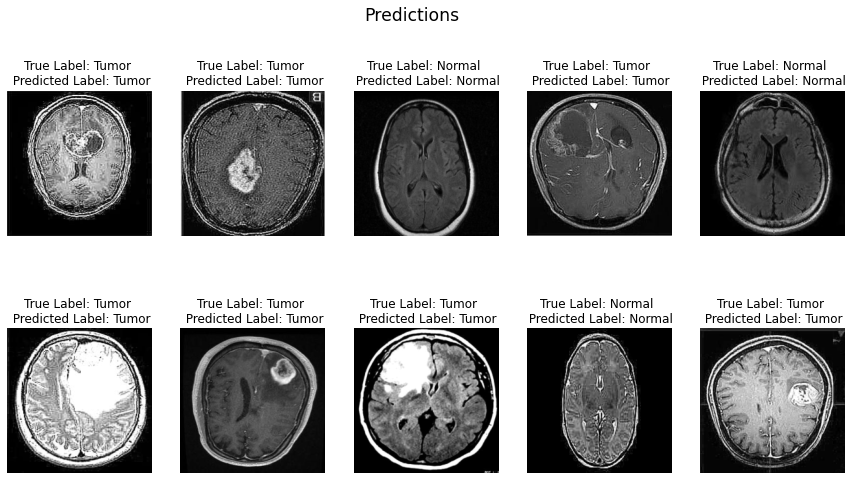

In [28]:
show_predictions(X_test, image_iterator, predictions)

### Transfer Learning

The idea of transfer learning is to assign something learned from one task and apply it to another. Training whole models from scratch every time is less efficient, and its success depends on many circumstances. For specific applications, the datasets that are publicly available are not big enough to train a deep architecture without over-fitting, which means failing to generalize. The final layers can be used to work on other tasks, be it detection or classification; they end up having similar weights [12].

This concept means that a deep architecture that trains a significantly large amount of data can be very well generalized, that its convolutional weights can act as feature extractors, and can be used to train a linear classifier for different tasks [12].

### Inception v3 Model

Taking into account that transfer learning refers to the training of an initialized network with weights taken from another previously trained model, we will have to select one. 

[Keras Applications](https://keras.io/api/applications/) are available deep learning models for prediction, feature extraction, and fine-tuning. Currently, there are 26 models ready to use. Michelucci explains how to use pre-trained deep learning models in Keras [12]. 

For this work, we chose the [Inception v3](https://keras.io/api/applications/inceptionv3/) model [13] pre-trained on the [ImageNet](http://image-net.org/) dataset as a feature extractor. We selected [Inception v3](https://keras.io/api/applications/inceptionv3/) as it has the ability to extract features of varying scales by applying convolutions in parallel to an input feature map and concatenating its output responses. 


In [29]:
# Instantiates the Inception v3 architecture

inception_model = Sequential()
inception_model.add(InceptionV3(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,)))
inception_model.add(Dropout(0.3))
inception_model.add(Flatten())
inception_model.add(Dropout(0.5))
inception_model.add(Dense(2, activation=ACTIVATION_3))

inception_model.layers[0].trainable = False

inception_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102402    
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


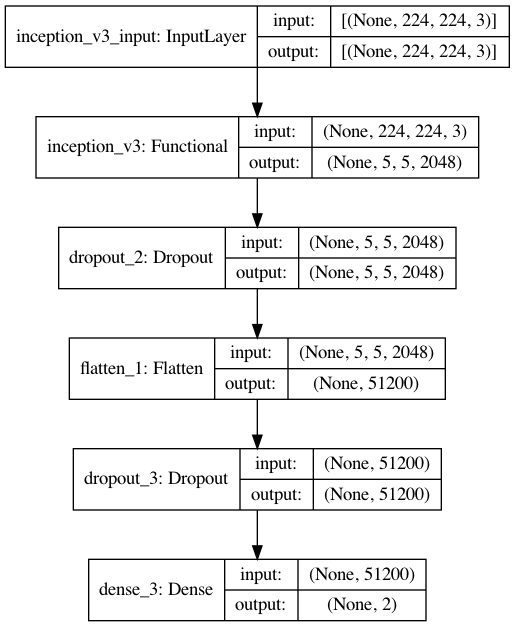

In [30]:
plot_model(inception_model, to_file='inception-model.png', show_shapes=True, show_layer_names=True)

In [31]:
# Compile model

inception_model.compile(optimizer = RMSprop(learning_rate = LEARNING_RATE), loss='categorical_crossentropy',
                        metrics =['accuracy'])

#### Training

In [32]:
# In order to use the Inception v3 model, we have to preprocess input images
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input

inception_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

# Train Model
history = model_training(inception_model, INCEPTION_MODEL_NAME, inception_datagen, X_train, X_val)

Found 2700 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.
Epoch 1/100
270/270 [==============================] - 74s 266ms/step - loss: 22.7964 - accuracy: 0.5887 - val_loss: 12.6700 - val_accuracy: 0.6767

Epoch 00001: val_accuracy improved from -inf to 0.67667, saving model to inception-model.h5
Epoch 2/100
270/270 [==============================] - 75s 279ms/step - loss: 17.2727 - accuracy: 0.6529 - val_loss: 10.7432 - val_accuracy: 0.6900

Epoch 00002: val_accuracy improved from 0.67667 to 0.69000, saving model to inception-model.h5
Epoch 3/100
270/270 [==============================] - 76s 282ms/step - loss: 17.6029 - accuracy: 0.6559 - val_loss: 14.1904 - val_accuracy: 0.6767

Epoch 00003: val_accuracy did not improve from 0.69000
Epoch 4/100
270/270 [==============================] - 76s 283ms/step - loss: 16.5898 - accuracy: 0.6701 - val_loss: 11.2448 - val_accuracy: 0.7400

Epoch 00004: val_accuracy improved from 0

270/270 [==============================] - 82s 303ms/step - loss: 13.0421 - accuracy: 0.7639 - val_loss: 6.5998 - val_accuracy: 0.8067

Epoch 00039: val_accuracy did not improve from 0.82667
Epoch 40/100
270/270 [==============================] - 81s 299ms/step - loss: 13.1966 - accuracy: 0.7543 - val_loss: 7.7270 - val_accuracy: 0.7967

Epoch 00040: val_accuracy did not improve from 0.82667
Epoch 41/100
270/270 [==============================] - 82s 302ms/step - loss: 14.8266 - accuracy: 0.7454 - val_loss: 10.0026 - val_accuracy: 0.7500

Epoch 00041: val_accuracy did not improve from 0.82667
Epoch 42/100
270/270 [==============================] - 81s 298ms/step - loss: 12.6500 - accuracy: 0.7551 - val_loss: 13.2797 - val_accuracy: 0.7067

Epoch 00042: val_accuracy did not improve from 0.82667
Epoch 43/100
270/270 [==============================] - 80s 296ms/step - loss: 12.1552 - accuracy: 0.7515 - val_loss: 9.7789 - val_accuracy: 0.7833

Epoch 00043: val_accuracy did not improve from

#### Model Metrics

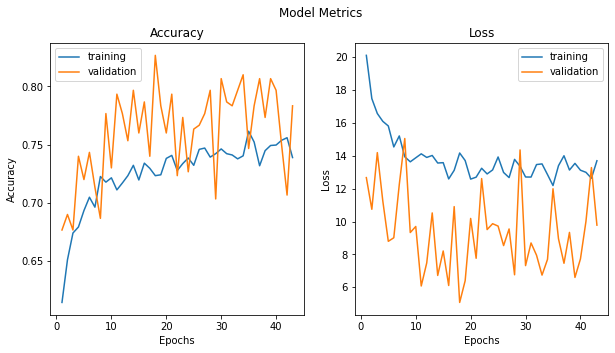

In [33]:
acc_loss_plot(history.history)

#### Predictions

In [34]:
# Load Model from File

inception_v3 = keras.models.load_model(INCEPTION_MODEL_NAME)

In [35]:
# Datagen for predictions

inception_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

Found 300 validated image filenames.
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       145
           1       0.83      0.75      0.79       155

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



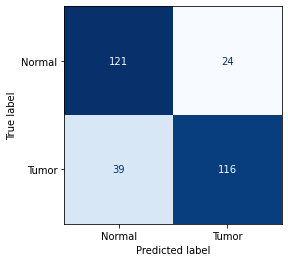

In [36]:
# Predictions for Validation Data

_, _ = get_predictions(inception_v3, X_val, idg=inception_datagen)

Found 10 validated image filenames.
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



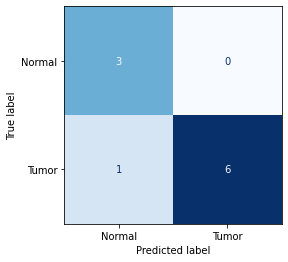

In [37]:
# Predictions for Test Data

image_iterator, predictions = get_predictions(inception_v3, X_test, idg=inception_datagen)

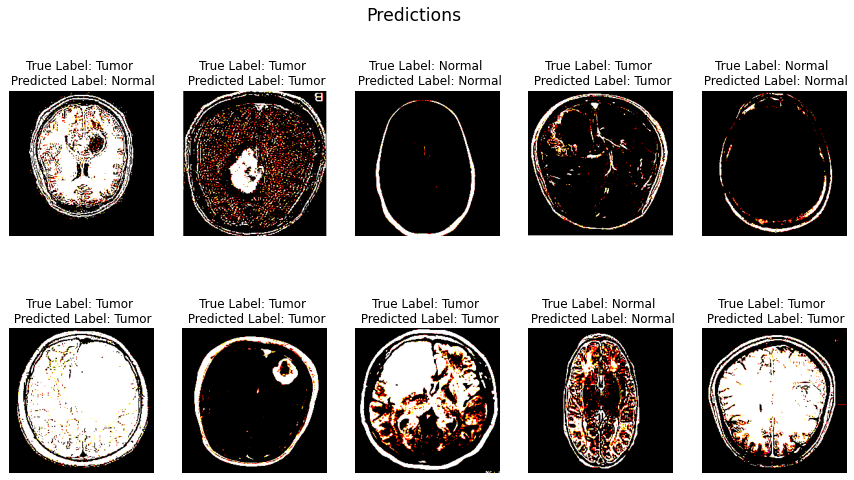

In [38]:
show_predictions(X_test, image_iterator, predictions)

## Web Application

Thanks to [Streamlit](https://streamlit.io/), a web application is available, where it is possible to test the classifier interactively.

The link to access the application is [Brain Tumor Classifier Demo](https://share.streamlit.io/david-solis/btc-demo/app.py).

![Streamlit Web App](images/streamlit-web-app.png "Streamlit Web App")

## Conclusions
We obtained accuracies of both models between 70 and 90%. In average, the model that used the pre-trained deep convolutional network performed better.

These models need a finer tunning, and due to the image size variation, cropping techniques will probably be required for image preprocessing.

On the other hand, the project code is extensible and prepared for the segmentation of data sets such as [Figshare](https://figshare.com/articles/brain_tumor_dataset/1512427) with multiple classes (meningioma, glioma, and pituitary tumor).

Possible extensions to this work are the exploration and incorporation of other pre-trained models (for example, VGG variants and ResNet variants) [14], [15] and the adoption of [MLOps](https://ml-ops.org/) practices for the automation of tests to be able to make comparisons between runs of multiple scenarios.

## Bibliography and References
[1] Pareek, M., Jha, C., Mukherjee, S., & Joshi, C. (2018). Brain Tumor Detection Using Wathershed Segmentation Techniques and Area Calculation. *International Journal of Informatics and Communication Technology, 7,* 71-76.

[2] Castiglioni, I., Rundo, L., Codari, M., Di Leo, G., Salvatore, C., Interlenghi, M., ... & Sardanelli, F. (2021). AI applications to medical images: From machine learning to deep learning. *Physica Medica, 83,* 9-24.

[3] Lundervold, A. S., & Lundervold, A. (2019). An overview of deep learning in medical imaging focusing on MRI. *Zeitschrift für Medizinische Physik, 29(2),* 102-127.

[4] Houssein, E. H., Emam, M. M., Ali, A. A., & Suganthan, P. N. (2020). Deep and machine learning techniques for medical imaging-based breast cancer: A comprehensive review. *Expert Systems with Applications, 114161*.

[5] Bertero, L., & Cassoni, P. (2019). Classification of tumours of the central nervous system. In *Neurorehabilitation in Neuro-Oncology* (pp. 21-36). Springer.

[6] Zhao, X., & Zhao, X. M. (2020). Deep learning of brain magnetic resonance images: A brief review. *Methods*.

[7] Parisot, S. (2013). *Understanding, Modeling and Detecting Brain Tumors: Graphical Models and Concurrent Segmentation/Registration methods* (Doctoral dissertation, Ecole Centrale Paris).

[8] Sabitha, V., Nayak, J., & Reddy, P. R. (2021). MRI brain tumor detection and classification using KPCA and KSVM. *Materials Today: Proceedings*.

[9] Hossain, T., Shishir, F. S., Ashraf, M., Al Nasim, M. A., & Shah, F. M. (2019, May). Brain Tumor Detection Using Convolutional Neural Network. In *2019 1st International Conference on Advances in Science, Engineering and Robotics Technology (ICASERT)* (pp. 1-6). IEEE.

[10] Sarkar, D., Bali, R., & Ghosh, T. (2018). *Hands-On Transfer Learning with Python: Implement advanced deep learning and neural network models using TensorFlow and Keras*. Packt Publishing Ltd.

[11] Zafar, I., Tzanidou, G., Burton, R., Patel, N., & Araujo, L. (2018). *Hands-on convolutional neural networks with TensorFlow: Solve computer vision problems with modeling in TensorFlow and Python*. Packt Publishing Ltd.

[12] Michelucci, U. (2019). *Advanced applied deep learning: convolutional neural networks and object detection*. Apress.

[13] Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2016). Rethinking the inception architecture for computer vision. In *Proceedings of the IEEE conference on computer vision and pattern recognition* (pp. 2818-2826).

[14] Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. *arXiv preprint arXiv:1409.1556*.

[15] He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In *Proceedings of the IEEE conference on computer vision and pattern recognition* (pp. 770-778).